# Cutting.ipynb
Author: Yueqian Lin

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline   
import scipy.ndimage
import cv2
import xml.dom.minidom
from PIL import Image
import numpy as np
import os, glob
import tensorflow as tf
from tensorflow import keras

In [2]:
# in case you can't import cv2
pip install opencv-python

     |████████████████████████████████| 60.4 MB 38.8 MB/s eta 0:00:01     |████████████████████▍           | 38.6 MB 38.8 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
def readxml(path):
    dom = xml.dom.minidom.parse(path)
    root = dom.documentElement
    nas = ['xmin', 'xmax', 'ymin', 'ymax']
    objects = root.getElementsByTagName("object")
    datas = []
    for i in range(len(objects)):
        bnd = objects[i].getElementsByTagName("bndbox")[0]
        datas.append([0, 0, 0, 0])
        for ele in bnd.childNodes:
            try:
                na = ele.tagName
            except:
                continue
            for j in range(len(nas)):
                if nas[j] == na:
                    datas[i][j] = int(ele.firstChild.data)
    if len(datas) == 1:
        datas.pop()
    objects = root.getElementsByTagName("item")
    for i in range(len(objects)):
        bnd = objects[i].getElementsByTagName("bndbox")[0]
        datas.append([0, 0, 0, 0])
        for ele in bnd.childNodes:
            try:
                na = ele.tagName
            except:
                continue
            for j in range(len(nas)):
                if nas[j] == na:
                    datas[i][j] = int(ele.firstChild.data)
    return datas
def tis(x):
    if x < 0:
        return 0
    if x > gap:
        return gap
    return x
from PIL import Image
import numpy as np
import os, glob
# import tensorflow as tf
# from tensorflow import keras

X_full = []
Y_full = []
X_sp = []
Y_sp = []
now = 0

def get_real_pos(n, x, y, k):
    if k == 0:
        return (x, y)
    if k == -1:
        return (n - y, x)
    if k == 2 or k == -2:
        return (n - x, n - y)
    if k == 1:
        return (y, n - x)

def get_real_pos2(n, a, k):
    if k == 0:
        return a
    if k == -1:
        return [n - a[3], n - a[2], a[0], a[1]]
    if k == 2 or k == -2:
        return [n - a[1], n - a[0], n - a[3], n - a[2]]
    if k == 1:
        return [a[2], a[3], n - a[1], n - a[0]]

def get_real_pos3(n, m, a, k):
    if k == 0:
        return a
    if k == -1:
        return [n - a[3], n - a[2], a[0], a[1]]
    if k == 2 or k == -2:
        return [m - a[1], m - a[0], n - a[3], n - a[2]]
    if k == 1:
        return [a[2], a[3], m - a[1], m - a[0]]
import numpy as np
def flip180(arr):
    new_arr = arr.reshape(arr.size)
    new_arr = new_arr[::-1]
    new_arr = new_arr.reshape(arr.shape)
    return new_arr
def flip90_left(arr):
    new_arr = np.transpose(arr)
    new_arr = new_arr[::-1]
    return new_arr
def flip90_right(arr):
    new_arr = arr.reshape(arr.size)
    new_arr = new_arr[::-1]
    new_arr = new_arr.reshape(arr.shape)
    new_arr = np.transpose(new_arr)[::-1]
    return new_arr
def get_real_img(arr, k):
    if k == 0:
        return arr
    if k == -1:
        return flip90_right(arr)
    if k == 2 or k == -2:
        return flip180(arr)
    if k == 1:
        return flip90_left(arr)

def get_real_img2(arr, k):
    img = Image.fromarray(np.uint8(arr))
    if k == 0:
        return np.asarray(img)
    if k == -1:
        return np.asarray(img.transpose(Image.ROTATE_270))
    if k == 2 or k == -2:
        return np.asarray(img.transpose(Image.ROTATE_180))
    if k == 1:
        return np.asarray(img.transpose(Image.ROTATE_90))

def get_areas(box):
    return (box[1] - box[0]) * (box[3] - box[2])


In [6]:
# transform the xml file to position
data=readxml("xxx.xml")

In [10]:
readxml("xxx.xml")

[[149, 164, 349, 368],
 [326, 347, 718, 732],
 [112, 131, 111, 128],
 [366, 390, 499, 520],
 [345, 363, 574, 600],
 [126, 136, 146, 152],
 [131, 140, 152, 159],
 [166, 181, 169, 183],
 [75, 90, 174, 186],
 [101, 117, 194, 206],
 [164, 178, 200, 213],
 [161, 177, 230, 245],
 [124, 143, 239, 250],
 [73, 84, 201, 211],
 [81, 92, 208, 215],
 [75, 78, 216, 220],
 [129, 145, 268, 283],
 [165, 179, 279, 293],
 [118, 134, 293, 301],
 [145, 159, 294, 306],
 [170, 183, 312, 325],
 [202, 216, 310, 322],
 [209, 225, 246, 258],
 [214, 227, 209, 216],
 [242, 253, 236, 247],
 [137, 149, 324, 337],
 [283, 300, 247, 262],
 [125, 140, 381, 399],
 [178, 195, 367, 376],
 [169, 183, 397, 409],
 [145, 167, 419, 436],
 [117, 129, 421, 428],
 [101, 116, 436, 445],
 [280, 292, 299, 312],
 [317, 334, 250, 267],
 [345, 365, 255, 271],
 [327, 347, 285, 304],
 [307, 318, 312, 324],
 [300, 315, 347, 359],
 [271, 286, 347, 362],
 [200, 216, 411, 420],
 [231, 244, 400, 409],
 [253, 265, 414, 425],
 [277, 292, 385, 40

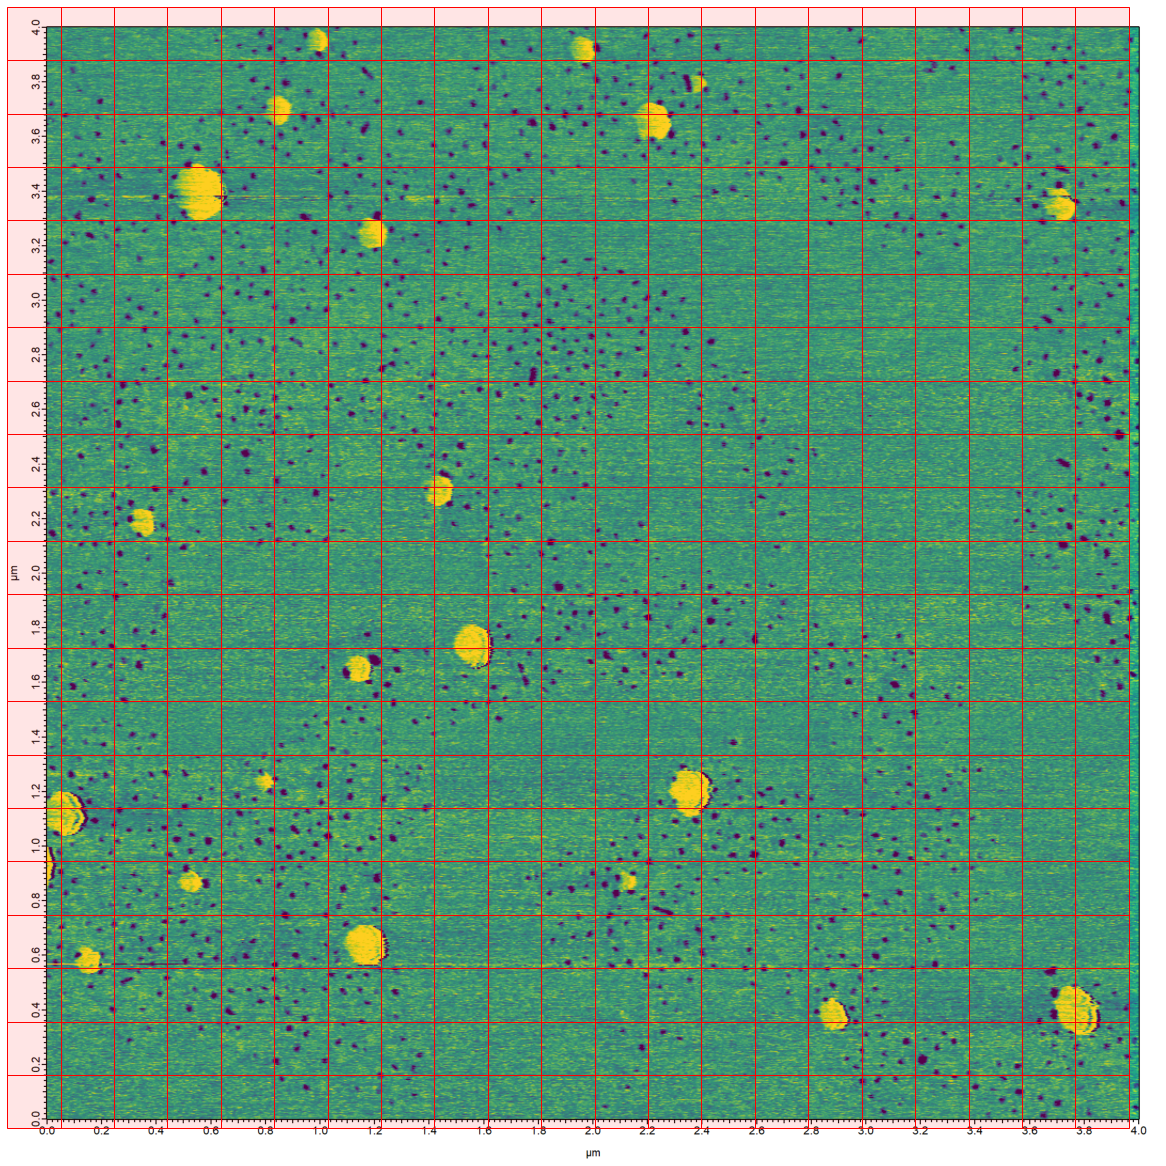

In [15]:
# this is used to find the suitable gap
im = np.asarray(Image.open(filename))
gap=175
plt.figure(figsize=(20, 16))
plt.imshow(im)
ap = plt.gca()
plt.axis('off')
for i in range(0, xn, gap):
    for j in range(0, yn, gap):
        if (i + gap < xn) and (j + gap < yn):
            rect = patches.Rectangle((j - 0.5, i - 0.5), gap, gap, linewidth = 1, edgecolor = 'r', facecolor = "none")
            ap.add_patch(rect)
            rect = patches.Rectangle((j - 0.5, i - 0.5), gap, gap, color = "r", alpha = 0.1)
            ap.add_patch(rect)
# for i in range(int(gap / 2), xn, gap):
#     for j in range(int(gap / 2), yn, gap):
#         if (i + gap < xn) and (j + gap < yn):
#             rect = patches.Rectangle((j - 0.5, i - 0.5), gap, gap, linewidth = 1, edgecolor = 'g', facecolor = "none")
#             ap.add_patch(rect)
#             rect = patches.Rectangle((j - 0.5, i - 0.5), gap, gap, color = "g", alpha = 0.1)
#             ap.add_patch(rect)
# for i in range(xn, 0, -gap):
#     for j in range(yn, 0, -gap):
#         if (i - gap > 0) and (j - gap > 0):
#             rect = patches.Rectangle((j - 0.5 - gap, i - 0.5 - gap), gap, gap, linewidth = 1, edgecolor = 'b', facecolor = "none")
#             ap.add_patch(rect)
#             rect = patches.Rectangle((j - 0.5 - gap, i - 0.5 - gap), gap, gap, color = "b", alpha = 0.1)
#             ap.add_patch(rect)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
plt.savefig("ex.png", dpi = 300)

Max particle in the section:20
Avg particle in the section:11.777777777777779



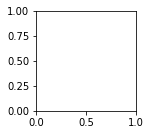

In [10]:
f1= open("/home/yl768/UVM_H/images/46k_105C/1/train.txt", "w") #You need to create this txt file at first
tots = 0
cnts = 0
now = 0
for filename in glob.glob("/home/yl768/UVM_H/images/46k_105C/1/*.tif"):
        for o in range(4):
            nam = filename[18:30] #find the position of the file, this is not elegant...
#             datas = readxml("./UVM/outputs/" + nam + ".xml") 
            datas=readxml("/home/yl768/UVM_H/images/46k_105C/1/X105C0005PhRm0.xml")
            if o <= 1:
                im = np.asarray(Image.open(filename))
            else:
                im = np.asarray(Image.open(filename).transpose(Image.ROTATE_180))
                tmp = []
                for box in datas:
                    tmp.append(get_real_pos3(xn, yn, box, 2))
                datas = tmp
    #         print(im.shape)
            xn, yn,z = im.shape
            poi = []


            ims = []
            newpoi = []
            imgpos = []

            gap = 175
            maxs = 0
            avg = 0
            cnt = 0

            avg_area = 0
            for box in datas:
                avg_area += get_areas(box)
            avg_area /= len(datas)
            for i in range(0, xn, gap):
                for j in range(0, yn, gap):
                #                 for k in range(-1, 3): # rotate
                    for k in range(0, 2):
                        k = o - 1
                        if k == 1:
                            tm = np.random.randint(1, 4)
                            if tm != 1:
                                continue
                            while k == o-1:
                                k = np.random.randint(-1, 3)
                        if (i + gap < xn) and (j + gap < yn):
                            ims.append(get_real_img2(np.asarray(im[i : i + gap, j : j + gap]), k))
                            imgpos.append((int(i / gap), int(j / gap)))
                            poi.append([])
                            newpoi.append([])
                            tmp = 0
                            for l in datas:
                                if ((l[0] > j and l[0] < j + gap) or (l[1] > j and l[1] < j + gap) or 
                                    (l[2] > i and l[3] < i + gap) or (l[3] > i and l[3] < i + gap)):
                                    lp = [tis(l[0] - j), tis(l[1] - j), tis(l[2] - i), tis(l[3] - i)]
                                    if lp[0] == lp[1] or lp[2] == lp[3]:
                                        continue
                                    if get_areas(lp) <= avg_area / 10:
                                        continue
                                    newpoi[len(newpoi) - 1].append(get_real_pos2(gap, lp, k))
                                    tmp += 1

                            maxs = max(maxs, tmp)
                            if tmp != 0:
                                avg += tmp
                                cnt += 1
        print("Max particle in the section:" + str(maxs))
        print("Avg particle in the section:" + str(avg / cnt))
        print("")
        tots += avg / cnt
        cnts += 1
        for k in range(len(ims)):
            if len(newpoi[k]) == 0:
                continue
            p = ims[k]
            plt.imshow(p)
            plt.axis('off')
            fig = plt.gcf()
            fig.set_size_inches(4.16/3,4.16/3) #dpi = 300, output = 416*416 pixels
            plt.gca().xaxis.set_major_locator(plt.NullLocator())
            plt.gca().yaxis.set_major_locator(plt.NullLocator())
            plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
            plt.margins(0,0)
#           save the figure into directory, create the folder in advance
            fig.savefig('/home/yl768/UVM_H/images/46k_105C/1/test/' + (('0' + str(now)) if now < 10 else str(now)) + '.png', transparent=True, dpi=300, pad_inches = 0)
            plt.cla()
            sw = '/home/yl768/UVM_H/images/46k_105C/1/test/' + (('0' + str(now)) if now < 10 else str(now)) + '.png '
            lx = 416 / gap
            for ls in newpoi[k]:
                sw += str(int(ls[0] * lx))+','+str(int(ls[2] * lx))+','+str(int(ls[1] * lx))+','+str(int(ls[3] * lx))+',0 '
            f1.write(sw + '\n')
            now += 1


   